In [1]:
print('ok')

ok


In [1]:
import numpy as np  
import pandas as pd
import io
import requests
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import itertools
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [2]:
conda install -c anaconda xlrd --yes

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.11
  latest version: 4.8.0

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs: 
    - xlrd


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    numpy-base-1.15.4          |   py36h81de0dd_0         4.2 MB  anaconda
    numpy-1.15.4               |   py36h1d66e8a_0          35 KB  anaconda
    openssl-1.1.1              |       h7b6447c_0         5.0 MB  anaconda
    mkl_fft-1.0.6              |   py36h7dd41cf_0         150 KB  anaconda
    certifi-2019.11.28         |           py36_0         156 KB  anaconda
    blas-1.0                   |              mkl           6 KB  anaconda
    scipy-1.1.0                |   py36hfa4b5c9_1        18.0 MB  anaconda
   

In [3]:
conda install openpyxl

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.11
  latest version: 4.8.0

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs: 
    - openpyxl


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    et_xmlfile-1.0.1           |           py36_0          20 KB
    certifi-2019.11.28         |           py36_0         156 KB
    jdcal-1.4.1                |             py_0          11 KB
    openpyxl-3.0.2             |             py_0         158 KB
    openssl-1.1.1d             |       h7b6447c_3         3.7 MB
    ------------------------------------------------------------
                                           Total:         4.1 MB

The following packages will be UPDATED:

    certifi:    2019.11.28-

###STARTTTTTT

In [4]:
#Reading the file

df = pd.read_excel('xxx.xlsx')

In [5]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [6]:
len(df)

499

In [7]:
for index, row in df.iterrows():
    L=[]
    n=0
    for char in df['FormH'][index]:
        if char in ["W","D","L"]:
            n+=1
            L.append(char)
    df.at[index, 'FormH'] = L
for index, row in df.iterrows():
    L=[]
    n=0
    for char in df['FormA'][index]:
        if char in ["W","D","L"]:
            n+=1
            L.append(char)
    df.at[index, 'FormA'] = L

for index, row in df.iterrows():
    for char in df['Result'][index]:
        if char in ["H","D","A"]:
            df.at[index, 'Result'] = char

In [8]:
df.head(1)

,Away,EloA,EloH,FormA,FormH,Home,PA,PD,PH,Result,Sum,SumA
0,Arsenal,1813,1603,"[D, W, L, D, D, L, D]","[L, L, D, L, L, L, W]",Norwich,57.1,23.1,25.0,D,3,6


In [9]:
for index, row in df.iterrows():
    df.at[index, 'DivSum'] = df['Sum'][index]/float(df['SumA'][index]+0.5)
    df.at[index, 'DSum'] = df['Sum'][index]-(df['SumA'][index])

In [10]:
df.head()

,Away,EloA,EloH,FormA,FormH,Home,PA,PD,PH,Result,Sum,SumA,DivSum,DSum
0,Arsenal,1813,1603,"[D, W, L, D, D, L, D]","[L, L, D, L, L, L, W]",Norwich,57.1,23.1,25.0,D,3,6,0.461538,-3.0
1,SheffieldUnited,1673,1745,"[L, D, W, D, W, D, D]","[W, W, D, D, D, W, W]",Wolves,23.8,28.6,52.6,D,11,8,1.294118,3.0
2,Everton,1701,1820,"[L, L, W, L, D, W, L]","[W, L, W, W, W, W, W]",Leicester,19.0,25.0,62.1,H,12,5,2.181818,7.0
3,AstonVilla,1641,1795,"[D, W, W, L, L, L, W]","[D, L, D, W, L, W, D]",ManUnited,14.3,22.2,69.0,D,7,7,0.933333,0.0
4,ManCity,1994,1698,"[W, L, W, W, W, L, W]","[L, W, L, D, W, W, L]",Newcastle,86.2,12.5,7.7,D,7,10,0.666667,-3.0


In [18]:
#Train/test set with sum of FORM-ELO

X = df[['DSum', 'EloH', 'EloA']] .values  #.astype(float)
#X = df[['EloH','EloA']] .values

#Train/test set with BETS
#X = df[['PH', 'PD', 'PA']] .values  #.astype(float)

y = df['Result'].values





BEST VALUES: EloH - EloA - DSum for k =5


In [19]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[-0.7559602 ,  0.35588966,  1.80201256],
       [ 0.79109711,  1.31447974,  0.84941521],
       [ 1.82246865,  1.82077732,  1.03993468],
       [ 0.01756845,  1.65201146,  0.63167868],
       [-0.7559602 ,  0.99719992,  3.03358485]])

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (399, 3) (399,)
Test set: (100, 3) (100,)


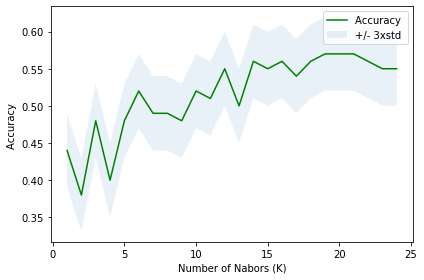

In [21]:
Ks = 25
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [22]:
k = 20
neigh6 = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
yhat6 = neigh6.predict(X_test)
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh6.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat6))

Train set Accuracy:  0.5463659147869674
Test set Accuracy:  0.57


In [23]:
yhat

array(['A', 'H', 'D', 'H', 'D', 'H', 'A', 'H', 'H', 'H', 'A', 'A', 'H',
       'A', 'H', 'A', 'H', 'H', 'A', 'H', 'A', 'H', 'A', 'H', 'A', 'D',
       'H', 'H', 'A', 'H', 'A', 'H', 'D', 'H', 'A', 'A', 'H', 'H', 'D',
       'H', 'H', 'H', 'D', 'H', 'A', 'H', 'A', 'H', 'H', 'A', 'A', 'D',
       'H', 'A', 'H', 'A', 'H', 'H', 'D', 'A', 'H', 'D', 'A', 'H', 'H',
       'H', 'A', 'D', 'H', 'H', 'H', 'H', 'A', 'H', 'A', 'A', 'H', 'H',
       'H', 'H', 'A', 'H', 'A', 'D', 'H', 'H', 'H', 'H', 'A', 'H', 'H',
       'H', 'H', 'H', 'H', 'H', 'H', 'A', 'H', 'H'], dtype=object)

In [24]:
y_test

array(['D', 'H', 'H', 'D', 'H', 'H', 'A', 'H', 'A', 'H', 'H', 'A', 'D',
       'A', 'H', 'D', 'H', 'D', 'A', 'H', 'H', 'H', 'A', 'D', 'H', 'H',
       'H', 'H', 'H', 'H', 'A', 'H', 'D', 'A', 'A', 'H', 'A', 'A', 'D',
       'D', 'H', 'A', 'A', 'H', 'A', 'D', 'D', 'D', 'H', 'A', 'A', 'H',
       'H', 'H', 'D', 'H', 'H', 'D', 'D', 'H', 'A', 'D', 'A', 'H', 'A',
       'H', 'A', 'A', 'H', 'H', 'H', 'H', 'D', 'H', 'D', 'A', 'A', 'H',
       'H', 'H', 'A', 'A', 'A', 'A', 'H', 'H', 'H', 'H', 'D', 'A', 'H',
       'H', 'D', 'H', 'D', 'H', 'A', 'D', 'D', 'H'], dtype=object)